# In this notebook we will atempt to restore the original images with the bounding boxes of the cropped images.

In [1]:
import os
import glob

jpg_files = glob.glob('detection_data/images/*.jpg')
file_names = [file.split('/')[-1] for file in jpg_files]
# print(file_names)

file_names_without_extension = [os.path.splitext(file)[0] for file in file_names]
print(file_names_without_extension)

['153_20200618121032', '249_20210828004742', '211_20210827035008', '270_20210826000838', '153_20200617171902', '261_20210908021342', '289_20210805011348', '243_20210802020909', '296_20210813233535', '268_20210915131146', '220_20210903143509', '215_20210802225329', '141_20200715233601', '113_20200520173448', '292_20210830085407', '124_20200807020809', '294_20210806021651', '246_20210921233001', '157_20200708023924', '150_20200611132637', '215_20210808232626', '280_20210904200101', '213_20210814002327', '252_20210912103111', '274_20210821010000', '289_20210803211532', '220_20210829040043', '192_20200715165926', '296_20210818052759', '155_20200522073640', '281_20210920140204', '271_20210918221803', '148_20200619011240', '282_20210821192015', '271_20210924003241', '213_20210814021918', '294_20210804032530', '210_20210813225146', '246_20210917211849', '292_20210813032204', '192_20200808002233', '272_20210801014921', '268_20210914204734', '150_20200624022551', '271_20210917021757', '291_2021

In [2]:
len(file_names_without_extension)

3237

In [3]:
len(set(file_names_without_extension))

3237

In [4]:
file_names_without_extension[27]

'192_20200715165926'

In [5]:
jpg_files = glob.glob('classification_data/images/*.jpg')
file_names = [file.split('/')[-1] for file in jpg_files]
# print(file_names)

crops_without_extension = [os.path.splitext(file)[0] for file in file_names]
# print(file_names_without_extension)

cropped_names = [name.split('_', 2)[0] + '_' + name.split('_', 2)[1] for name in crops_without_extension]
print(cropped_names)

['141_20200716233636', '192_20200712115551', '126_20200810000545', '192_20200722171634', '172_20200807233730', '192_20200715165926', '126_20200729001929', '174_20200725154548', '118_20200613004736', '126_20200817015915', '290_20210725064205', '153_20200617152451', '261_20210908220448', '170_20200725021504', '147_20200625014739', '294_20210813011442', '148_20200709034047', '245_20210729233859', '192_20200715165926', '169_20200627033450', '192_20200712185739', '157_20200709013453', '126_20200816000112', '192_20200725054003', '150_20200720025310', '192_20200722090027', '296_20210813051911', '126_20200725031906', '153_20200617155357', '126_20200728234639', '213_20210902020323', '175_20200801021727', '274_20210909025212', '118_20200619013557', '149_20200626032104', '174_20200717221637', '168_20200720022257', '192_20200715002421', '150_20200611132637', '153_20200617155357', '108_20200816030907', '175_20200801021727', '192_20200721201113', '149_20200626032104', '192_20200715002421', '168_2020

In [170]:
len(cropped_names)

39445

In [179]:
temp_crops = [x for x in crops_without_extension if '192_20200715165926' in x]

In [180]:
temp_crops

['192_20200715165926_1074_t',
 '192_20200715165926_1031_t',
 '192_20200715165926_1089_t',
 '192_20200715165926_1194_t',
 '192_20200715165926_1169_t',
 '192_20200715165926_932_t',
 '192_20200715165926_977_t',
 '192_20200715165926_1111_t',
 '192_20200715165926_1154_t',
 '192_20200715165926_1210_t',
 '192_20200715165926_1049_t',
 '192_20200715165926_993_t',
 '192_20200715165926_1234_t',
 '192_20200715165926_1135_t',
 '192_20200715165926_1170_t',
 '192_20200715165926_1028_t',
 '192_20200715165926_1090_t',
 '192_20200715165926_1050_t',
 '192_20200715165926_1015_t',
 '192_20200715165926_953_t',
 '192_20200715165926_1108_t',
 '192_20200715165926_1209_t',
 '192_20200715165926_1052_t',
 '192_20200715165926_1017_t',
 '192_20200715165926_951_t',
 '192_20200715165926_1137_t',
 '192_20200715165926_1172_t',
 '192_20200715165926_991_t',
 '192_20200715165926_1236_t',
 '192_20200715165926_1092_t',
 '192_20200715165926_1212_t',
 '192_20200715165926_948_t',
 '192_20200715165926_1113_t',
 '192_20200715165

In [181]:
len(temp_crops)

314

In [10]:
len(cropped_names)

39445

In [11]:
len(set(cropped_names))

2973

In [12]:
len(list(set(cropped_names).intersection(set(file_names_without_extension))))

2973

In [13]:
matches = [x for x in set(file_names_without_extension) if x in set(cropped_names)]

In [14]:
len(matches)

2973

## We have established that we can reconstruct bounding boxes from 2973 images.
# Now lets try it using template matching.

In [ ]:
['153_20200618121032',
 '249_20210828004742',
 '211_20210827035008',
 '192_20200715165926']

In [252]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

img_rgb = cv2.imread('detection_data/images/192_20200715165926.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
i=0
bbox_df = pd.DataFrame(columns=['name', 'x', 'y'])
# bbox_df = pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2'])

for crop in temp_crops:
    template = cv2.imread('classification_data/images/' + crop + '.jpg', 0)
    h, w = template.shape[::]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_rgb, top_left, bottom_right, (0, 0, 255), 2)

    #save top_left as x and y and file name
    #top_left[0], top_left[1], crop
    bbox_df = pd.concat([bbox_df, pd.DataFrame([{'name': crop, 'x': top_left[0], 'y': top_left[1]}])], ignore_index=True)
    # bbox_df = pd.concat([bbox_df, pd.DataFrame([{'x1': top_left[0], 'y1': top_left[1], 'x2': bottom_right[0], 'y2': bottom_right[1]}])], ignore_index=True)


    i+=1

In [253]:
i

314

In [ ]:
314 + 

In [92]:
img = cv2.imread('detection_data/images/192_20200715165926.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()


# template = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
# assert template is not None, "file could not be read, check with os.path.exists()"
# w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
  img = img2.copy()
  method = eval(meth)
  i=0
  for crop in temp_crops:
    template = cv2.imread('classification_data/images/' + crop + '.jpg', cv2.IMREAD_GRAYSCALE)
    assert template is not None, "file could not be read, check with os.path.exists()"
    h, w = template.shape[::]
    res = cv2.matchTemplate(img, template, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      top_left = min_loc
    else:
      top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    i+=1
  print(meth.split('.')[1] + 'found: ' + str(i) + 'matches')
  cv2.imwrite('tests/' + meth.split('.')[1] + '.jpg', img)
    #save top_left as x and y and file name
    #top_left[0], top_left[1], crop
    # bbox_df = pd.concat([bbox_df, pd.DataFrame([{'name': crop, 'x': top_left[0], 'y': top_left[1]}])], ignore_index=True)


  # # Apply template Matching
  # res = cv2.matchTemplate(img,template,method)
  # min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  # # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  # if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
  #   top_left = min_loc
  # else:
  #   top_left = max_loc
  #   bottom_right = (top_left[0] + w, top_left[1] + h)

  # cv2.rectangle(img,top_left, bottom_right, 255, 2)

  # plt.subplot(121),plt.imshow(res,cmap = 'gray')
  # plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  # plt.subplot(122),plt.imshow(img,cmap = 'gray')
  # plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  # plt.suptitle(meth)
  # plt.show()

TM_CCOEFFfound: 314matches
TM_CCOEFF_NORMEDfound: 314matches
TM_CCORRfound: 314matches
TM_CCORR_NORMEDfound: 314matches
TM_SQDIFFfound: 314matches
TM_SQDIFF_NORMEDfound: 314matches


In [88]:
'tests/' + meth.split('.')[1] + '.jpg'

'tests/TM_CCOEFF.jpg'

In [79]:
os.chdir('tests')

In [163]:
sorted_bbox_df = bbox_df.sort_values('x', ascending=True)

In [164]:
sorted_bbox_df.to_csv('tests/gen_bbox.csv', index=False)

In [161]:
bbox_df.to_csv('tests/gen_bbox.csv', index=False)

In [64]:
crop

'192_20200715165926_1120_t'

In [109]:
top_left

(595, 2253)

In [110]:
i

314

In [37]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [34]:
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

In [200]:
import json

img_rgb = cv2.imread('detection_data/images/192_20200715165926.jpg')
img_gray2 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
i2 = 0
with open('detection_data/annotations/192_20200715165926.json') as json_file:
    data = json.load(json_file)
    for obj in data['annotations']:
        x = obj['shape']['x']
        y = obj['shape']['y']
        w = obj['shape']['width']
        h = obj['shape']['height']
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0,0,255), 2)
        i2 += 1


In [201]:
i2

314

In [202]:
cv2.imwrite('tests/org_bbox.jpg', img_rgb)

True

In [60]:
orgbbox = 'org_bbox.jpg'
genbbox = 'gen_bbox.jpg'
plain = 'plain.jpg'
cv2.imwrite(orgbbox, img_gray2)
cv2.imwrite(genbbox, img_gray)
cv2.imwrite(plain, img_rgb)

True

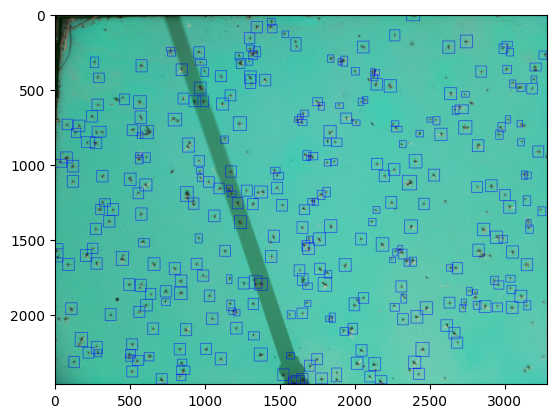

In [203]:
plt.imshow(img_rgb)

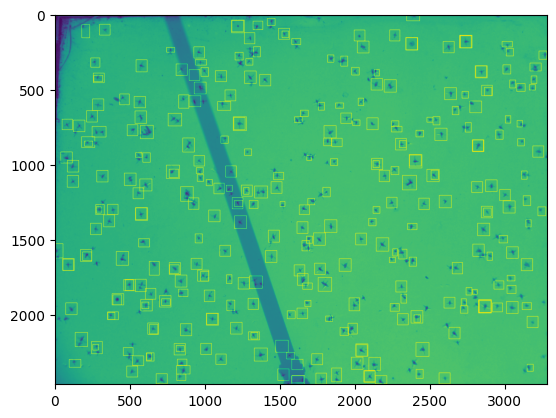

In [42]:
plt.imshow(img_gray)

array([[ 46,  42,  39, ...,  51,  52,  56],
       [ 45,  42,  38, ...,  52,  53,  57],
       [ 41,  39,  36, ...,  52,  53,  57],
       ...,
       [105, 106, 107, ..., 176, 176, 176],
       [101, 103, 106, ..., 176, 176, 177],
       [101, 104, 106, ..., 176, 176, 177]], dtype=uint8)

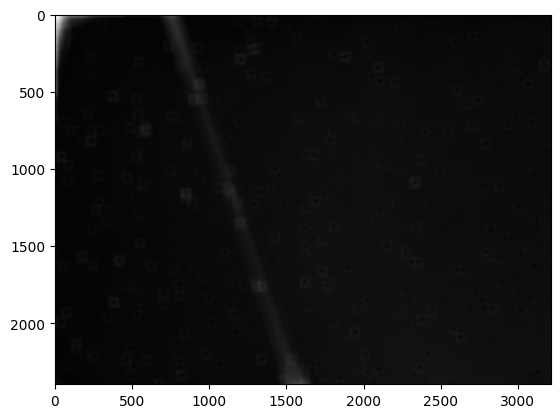

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('detection_data/images/192_20200715165926.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('classification_data/images/192_20200715165926_1074_t.jpg', 0)

h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)

plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)

# cv2.imshow('Matched image', img_gray)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [93]:
haystack = cv2.imread('detection_data/images/192_20200715165926.jpg')
grayhaystack = cv2.cvtColor(haystack, cv2.COLOR_BGR2GRAY)

needle = cv2.imread('classification_data/images/192_20200715165926_963_t.jpg')
grayneedle =cv2.cvtColor(needle, cv2.COLOR_BGR2GRAY)

cv2.imshow('Needle', needle)
cv2.imshow('Haystack', haystack)

#methods available :[cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TMO_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
result = cv2.matchTemplate(grayhaystack, grayneedle, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
needle_w = needle.shape[1]
needle_h = needle.shape[0]
top_left = max_loc
bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)
output = cv2.rectangle(haystack, top_left, bottom_right, (0, 0, 255), 3)

# cv2.imshow('Haystack', grayhaystack)
# cv2.imshow('Result', result)
# cv2.imshow('output', output)
# cv2.waitKey(0)

# cv2.imwrite('haystack_needle.png', output)

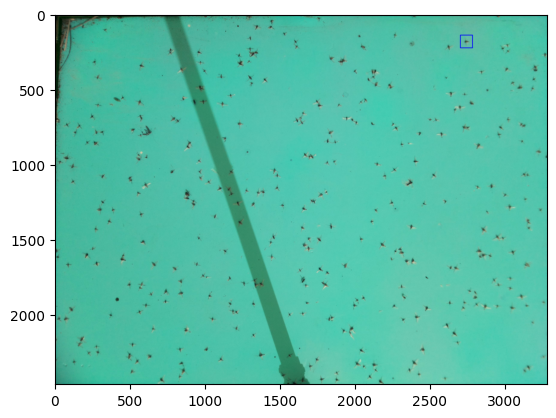

In [97]:
plt.imshow(output)

In [98]:
haystack = cv2.imread('detection_data/images/192_20200715165926.jpg')
grayhaystack = cv2.cvtColor(haystack, cv2.COLOR_BGR2GRAY)

needle = cv2.imread('classification_data/images/192_20200715165926_963_t.jpg')
grayneedle =cv2.cvtColor(needle, cv2.COLOR_BGR2GRAY)

cv2.imshow('Needle', needle)
cv2.imshow('Haystack', haystack)

#methods available :[cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TMO_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
result = cv2.matchTemplate(grayhaystack, grayneedle, cv2.TM_SQDIFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
needle_w = needle.shape[1]
needle_h = needle.shape[0]
top_left = min_loc
bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)
output = cv2.rectangle(haystack, top_left, bottom_right, (0, 0, 255), 3)

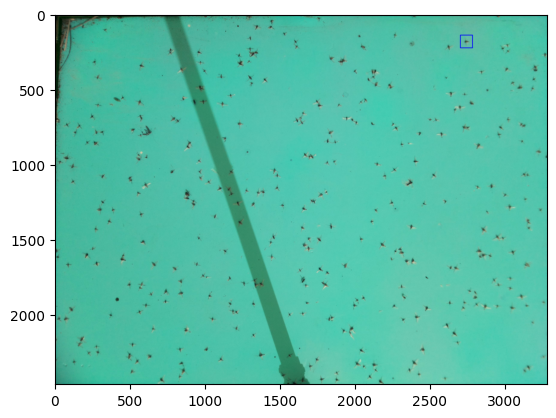

In [99]:
plt.imshow(output)

In [100]:
haystack = cv2.imread('detection_data/images/192_20200715165926.jpg')
grayhaystack = cv2.cvtColor(haystack, cv2.COLOR_BGR2GRAY)

needle = cv2.imread('classification_data/images/192_20200715165926_963_t.jpg', 0)
# grayneedle =cv2.cvtColor(needle, cv2.COLOR_BGR2GRAY)

#methods available :[cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TMO_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
result = cv2.matchTemplate(grayhaystack, grayneedle, cv2.TM_SQDIFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
needle_w = needle.shape[1]
needle_h = needle.shape[0]
top_left = min_loc
bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)
output = cv2.rectangle(haystack, top_left, bottom_right, (0, 0, 255), 3)

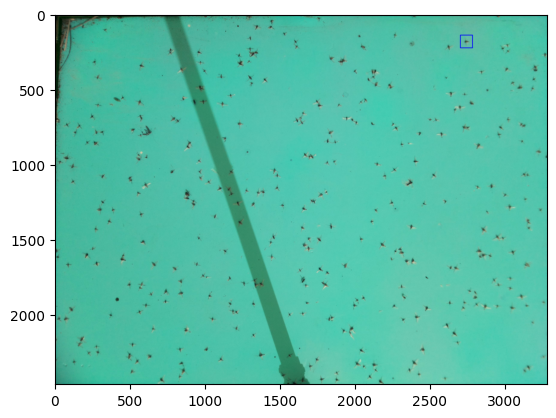

In [101]:
plt.imshow(output)

In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

img_rgb = cv2.imread('detection_data/images/192_20200715165926.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('classification_data/images/192_20200715165926_963_t.jpg', 0)
h, w = template.shape[::]
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)

array([[ 46,  42,  39, ...,  51,  52,  56],
       [ 45,  42,  38, ...,  52,  53,  57],
       [ 41,  39,  36, ...,  52,  53,  57],
       ...,
       [105, 106, 107, ..., 176, 176, 176],
       [101, 103, 106, ..., 176, 176, 177],
       [101, 104, 106, ..., 176, 176, 177]], dtype=uint8)

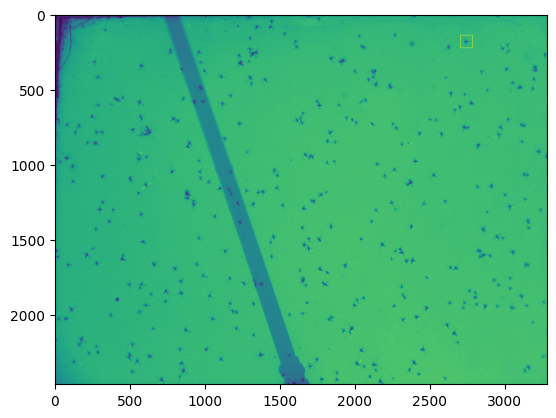

In [103]:
plt.imshow(img_gray)

In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

img_rgb = cv2.imread('detection_data/images/192_20200715165926.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
bbox_df = pd.DataFrame(columns=['name', 'x', 'y'])

template = cv2.imread('classification_data/images/192_20200715165926_963_t.jpg', 0)
h, w = template.shape[::]
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)

#save top_left as x and y and file name
#top_left[0], top_left[1], crop
bbox_df = pd.concat([bbox_df, pd.DataFrame([{'name': '192_20200715165926_963_t', 'x': top_left[0], 'y': top_left[1]}])], ignore_index=True)

In [174]:
bbox_df[bbox_df['name'] == '192_20200715165926_963_t']

,name,x,y
201,192_20200715165926_963_t,2702,140


In [102]:
temp_crops2.append('192_20200715165926_963_t')

In [104]:
temp_crops2 = temp_crops.copy()

In [105]:
len(temp_crops2)

314

In [113]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

img_rgb = cv2.imread('detection_data/images/192_20200715165926.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
i=0
bbox_df = pd.DataFrame(columns=['name', 'x', 'y'])

for crop in temp_crops2:
    template = cv2.imread('classification_data/images/' + crop + '.jpg', 0)
    h, w = template.shape[::]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_rgb, top_left, bottom_right, (0,0,255), 2)

    #save top_left as x and y and file name
    #top_left[0], top_left[1], crop
    bbox_df = pd.concat([bbox_df, pd.DataFrame([{'name': crop, 'x': top_left[0], 'y': top_left[1]}])], ignore_index=True)


    i+=1

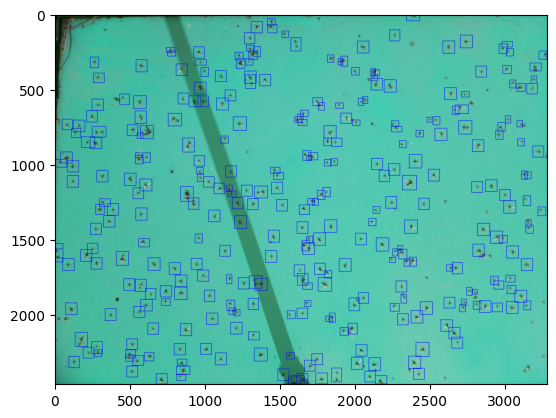

In [157]:
plt.imshow(img_rgb)

In [158]:
cv2.imwrite('tests/fixed1.jpg', img_rgb)

True

# Compare images

https://stackoverflow.com/questions/37203970/opencv-grayscale-mode-vs-gray-color-conversion

In [228]:
imgA = cv2.imread(r'tests/org_bbox.jpg', 0)
imgB = cv2.imread(r'tests/fixed2.jpg', 0)
sub = cv2.subtract(imgA, imgB)

In [241]:
imgA = cv2.cvtColor(cv2.imread(r'tests/org_bbox.jpg'), cv2.COLOR_BGR2GRAY)
imgB = cv2.cvtColor(cv2.imread(r'tests/fixed2.jpg'), cv2.COLOR_BGR2GRAY)
sub = cv2.subtract(imgA, imgB)

In [242]:
imgA.size

8081920

In [243]:
len(np.argwhere(sub > 0))

1743

# If len == 0 then skip calc and add `0`

In [244]:
round(100-len(np.argwhere(sub > 0))/imgA.size*100, 2)

99.98